In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.__version__

'3.9.2'

In [3]:
tf.__version__

'2.10.1'

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [5]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


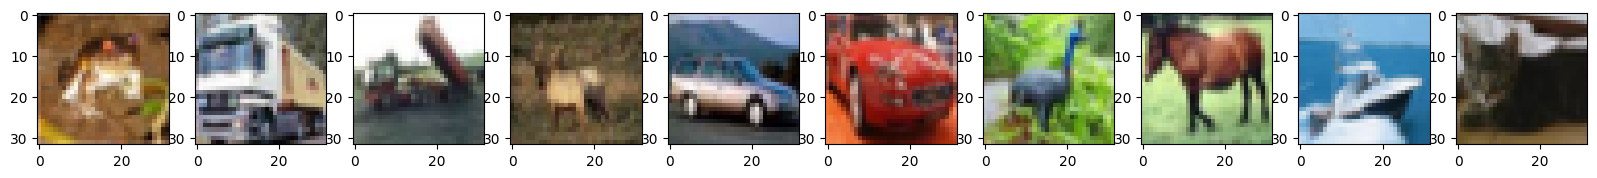

In [6]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [8]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [9]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [10]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

In [11]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 6,313,994
Trainable params: 6,313,994
Non-trainable params: 0
_________________________________________________________________


In [12]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = ann.fit(X_train ,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9239 - accuracy: 0.3254 - val_loss: 1.7343 - val_accuracy: 0.3745
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6869 - accuracy: 0.3938 - val_loss: 1.6637 - val_accuracy: 0.4045
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6142 - accuracy: 0.4250 - val_loss: 1.5774 - val_accuracy: 0.4391
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5724 - accuracy: 0.4418 - val_loss: 1.5565 - val_accuracy: 0.4386
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5350 - accuracy: 0.4552 - val_loss: 1.6166 - val_accuracy: 0.4379
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5070 - accuracy: 0.4668 - val_loss: 1.5169 - val_accuracy: 0.4596
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4835 - accuracy: 0.4756 - val_loss: 1.5214 - val_accuracy:

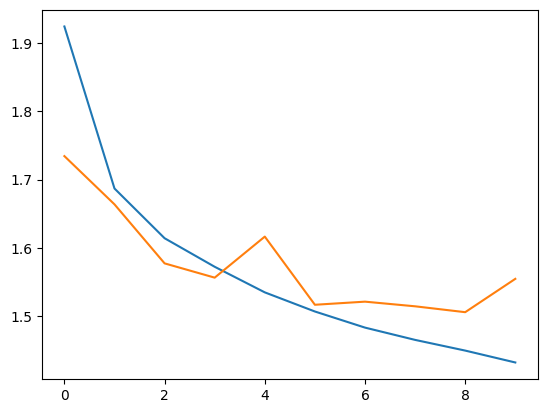

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [15]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [16]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

In [17]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)       

In [18]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 1.6085 - accuracy: 0.4048 - val_loss: 1.2626 - val_accuracy: 0.5489
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1758 - accuracy: 0.5829 - val_loss: 1.0095 - val_accuracy: 0.6462
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9668 - accuracy: 0.6625 - val_loss: 0.9169 - val_accuracy: 0.6890
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8321 - accuracy: 0.7127 - val_loss: 0.8175 - val_accuracy: 0.7142
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7256 - accuracy: 0.7504 - val_loss: 0.8303 - val_accuracy: 0.7127
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6378 - accuracy: 0.7823 - val_loss: 0.7562 - val_accuracy: 0.7489
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5565 - accuracy: 0.8068 - val_loss: 0.7581 - val_accuracy

In [19]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

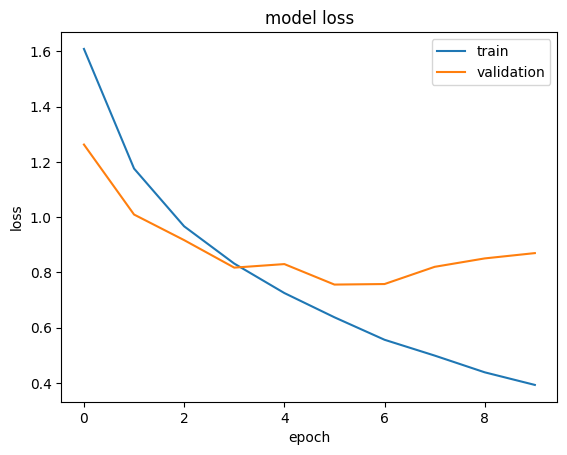

In [20]:
plotLosses(history)

In [21]:
def plotAccuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

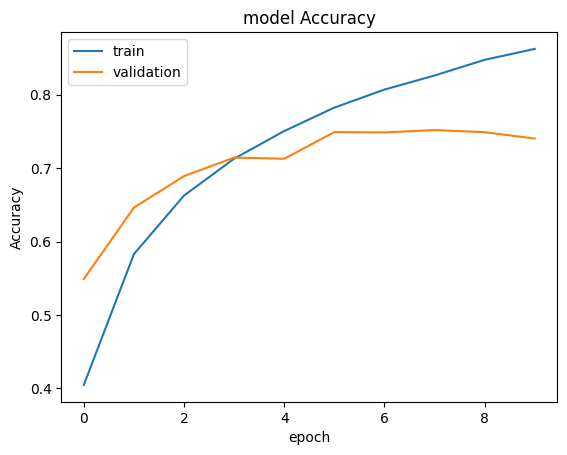

In [22]:
plotAccuracy(history)

In [23]:
from keras.models import load_model
cnn.save('model111.h5')

In [24]:
model = tf.keras.models.load_model('model111.h5')

In [28]:
import numpy as np
x_test_sample = np.expand_dims(x_test[10], axis=0)
model.predict(x_test_sample)

1/1 [==============================] - 0s 17ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

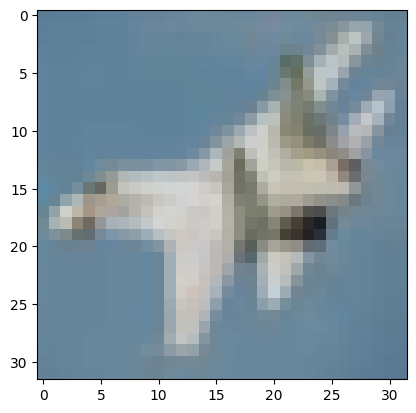

In [29]:
plt.imshow(x_test[10])

In [30]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  
predictions = model.predict(x_test_sample)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]
print(f"The predicted class is: {predicted_class_name}")

1/1 [==============================] - 0s 16ms/step
The predicted class is: airplane
